

---


#BINARY CLASSIFICATION

---



`import libraries`

numpy → generate random data

pandas → store data in a DataFrame

matplotlib → plotting

train_test_split → split dataset into training and testing

LogisticRegression → scikit-learn’s binary logistic regression model


In [250]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay


`Create synthetic dataset`

In [251]:
np.random.seed(42)   # reproducibility
n = 200              # number of students(sample/rows)
hours = np.random.normal(5, 2, n)   # study hours ~ Normal(mean=5, std=2)
sleep = np.random.normal(7, 1, n)   # sleep hours ~ Normal(mean=7, std=1)
# Rule to decide Pass/Fail
pass_fail = (0.5*hours + 0.3*sleep + np.random.randn(n)) > 5 #create(variable y)


`dataset`

In [252]:
df_binary=pd.DataFrame({"Hours":hours,"Sleep":sleep,"Pass":pass_fail.astype(int)})

In [253]:
df_binary.head()

,Hours,Sleep,Pass
0,5.993428,7.357787,0
1,4.723471,7.560785,0
2,6.295377,8.083051,1
3,8.046060,8.053802,1
4,4.531693,5.622331,0


#`EDA`

In [254]:
df_binary.isnull().sum()

,0
Hours,0
Sleep,0
Pass,0


In [255]:
df_binary.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [256]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   200 non-null    float64
 1   Sleep   200 non-null    float64
 2   Pass    200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [257]:
df_binary.shape

(200, 3)

`summary stats`

Distribution plots

histplot

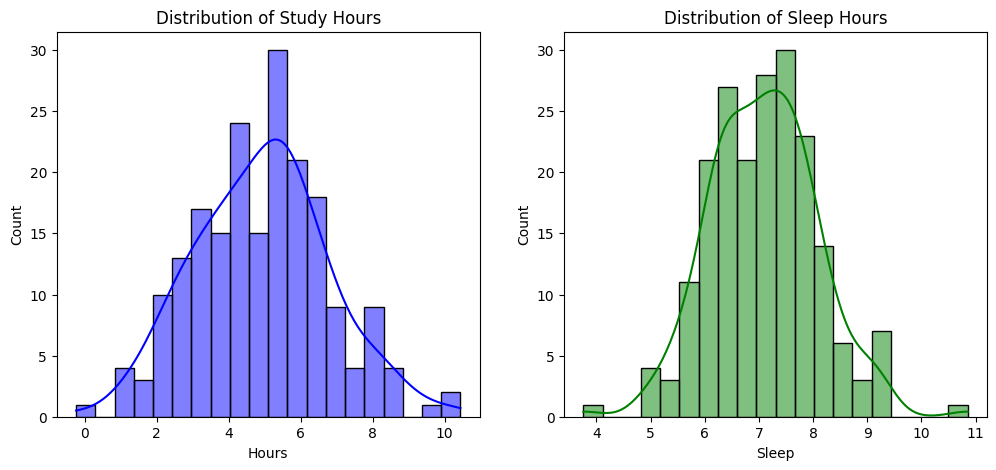

In [209]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_binary["Hours"], bins=20, kde=True, color="blue")
plt.title("Distribution of Study Hours")


plt.subplot(1,2,2)
sns.histplot(df_binary["Sleep"], bins=20, kde=True, color="green")
plt.title("Distribution of Sleep Hours")

plt.show()

target column--pass_fail

In [210]:
# Count values
df_binary["Pass"].value_counts()

,count
Pass,
0,134
1,66


In [211]:
# Percentage distribution
df_binary["Pass"].value_counts(normalize=True) * 100

,proportion
Pass,
0,67.0
1,33.0


/tmp/ipython-input-889756741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pass", data=df_binary, palette=["red","green"])


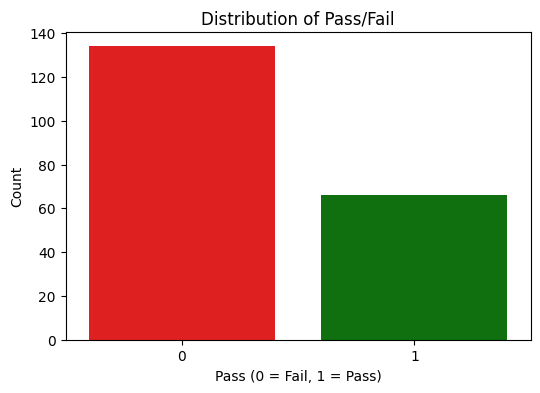

In [212]:
plt.figure(figsize=(6,4))
sns.countplot(x="Pass", data=df_binary, palette=["red","green"])
plt.title("Distribution of Pass/Fail")
plt.xlabel("Pass (0 = Fail, 1 = Pass)")
plt.ylabel("Count")
plt.show()


`box plot`

relation plots

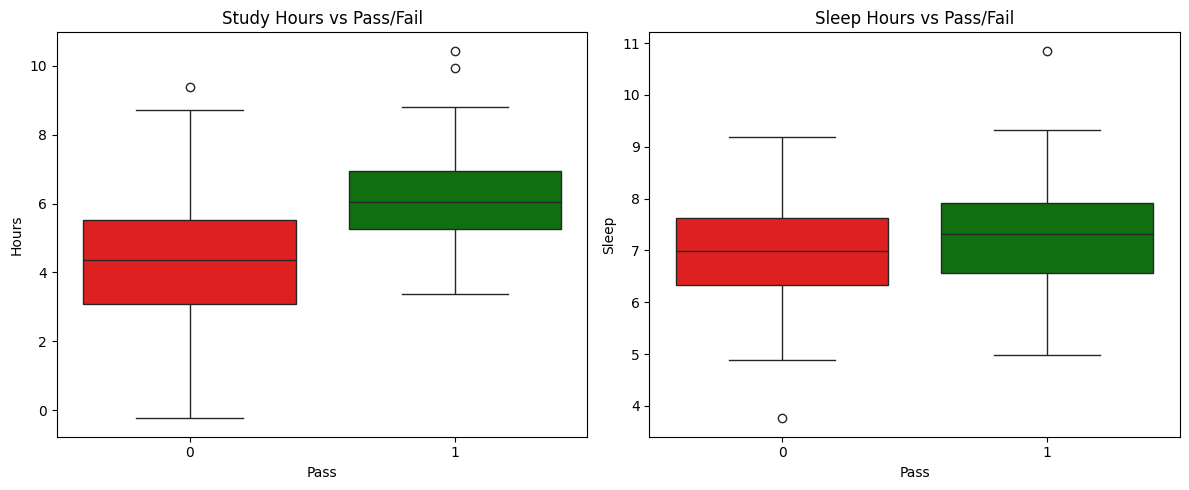

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x="Pass", y="Hours", data=df_binary, hue="Pass", palette=["red","green"], legend=False, ax=axes[0])
axes[0].set_title("Study Hours vs Pass/Fail")

sns.boxplot(x="Pass", y="Sleep", data=df_binary, hue="Pass", palette=["red","green"], legend=False, ax=axes[1])
axes[1].set_title("Sleep Hours vs Pass/Fail")

plt.tight_layout()
plt.show()


`scatter plot`

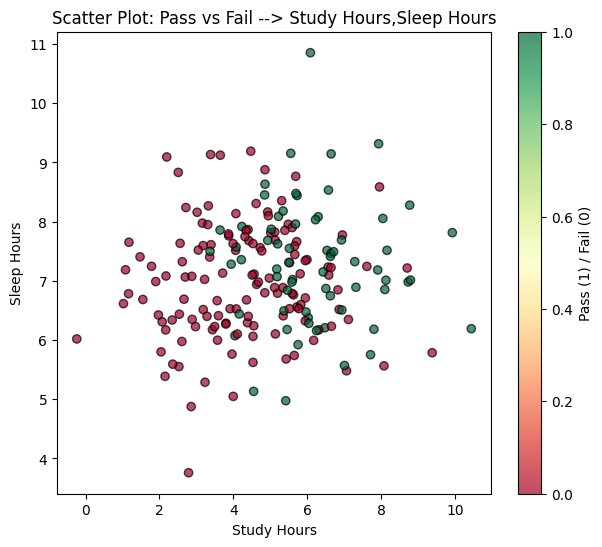

In [214]:
plt.figure(figsize=(7,6))
plt.scatter(df_binary["Hours"], df_binary["Sleep"],
            c=df_binary["Pass"], cmap="RdYlGn", edgecolor="k", alpha=0.7)

plt.title("Scatter Plot: Pass vs Fail --> Study Hours,Sleep Hours")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.colorbar(label="Pass (1) / Fail (0)")
plt.show()

`correlation heatmap`

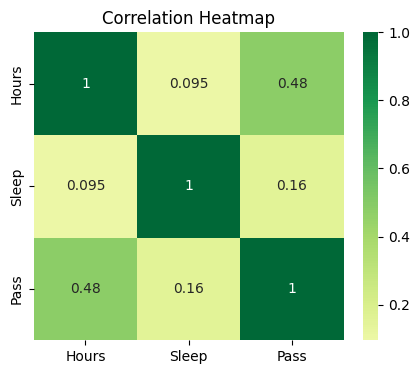

In [215]:
plt.figure(figsize=(5,4))
sns.heatmap(df_binary.corr(),annot=True,cmap="RdYlGn",center=0)
plt.title("Correlation Heatmap")
plt.show()

`split x and y features`

In [216]:
X=df_binary.iloc[:,:2]
y=df_binary.iloc[:,-1]

In [217]:
X


,Hours,Sleep
0,5.993428,7.357787
1,4.723471,7.560785
2,6.295377,8.083051
3,8.046060,8.053802
4,4.531693,5.622331
...,...,...
195,5.770635,6.530824
196,3.232285,5.286865
197,5.307450,8.353872
198,5.116417,6.885460


In [218]:
y

,Pass
0,0
1,0
2,1
3,1
4,0
...,...
195,0
196,0
197,0
198,0


`Train test split`

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

`Fit Logistic Regression Model`

In [220]:
binary_model = LogisticRegression()
binary_model.fit(X_train, y_train)


LogisticRegression()

`Predictions on test set`

In [221]:
y_pred=binary_model.predict(X_test)

`Probability of class 1(pass)`

In [222]:
y_prob=binary_model.predict_proba(X_test)[:,1]

## `EVALUATE`

`confusion matrix`

A confusion matrix is a performance evaluation tool for classification models in machine learning.
It tells us how well the model is performing by showing not only the correct predictions but also the mistakes.

⚡ Why is it Useful in ML?

The confusion matrix provides the basis for many important metrics:

Accuracy = (TP + TN) / (Total Predictions)
→ How often the model is correct.

Precision = TP / (TP + FP)
→ Of all predicted positives, how many are correct?

Recall (Sensitivity/TPR) = TP / (TP + FN)
→ Of all actual positives, how many did we catch?

Specificity (TNR) = TN / (TN + FP)
→ Of all actual negatives, how many did we correctly identify?

F1-Score = 2 × (Precision × Recall) / (Precision + Recall)
→ Harmonic mean of precision & recall (balances them).

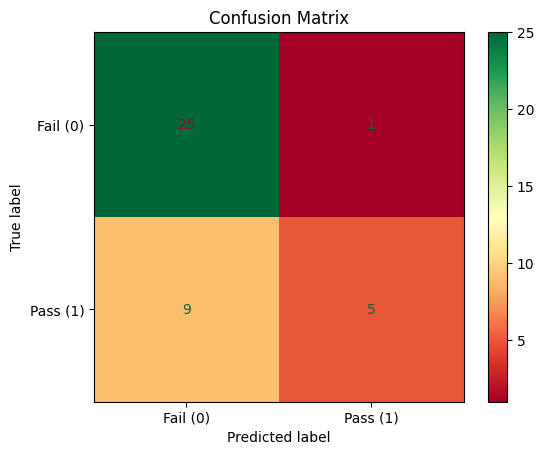

In [223]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail (0)", "Pass (1)"])
disp.plot(cmap="RdYlGn")
plt.title("Confusion Matrix")
plt.show()

`Accuracy score`

In [224]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.75


`Classification Report`

In [225]:
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))

              precision    recall  f1-score   support

        Fail       0.74      0.96      0.83        26
        Pass       0.83      0.36      0.50        14

    accuracy                           0.75        40
   macro avg       0.78      0.66      0.67        40
weighted avg       0.77      0.75      0.72        40



**Classification Report:**

Class: Fail

* Precision = 0.74
  When the model predicts Fail,it’s correct 74% of the time.

* Recall = 0.96
 Out of all actual Fail students, the model correctly identified 96%.

* F1-score = 0.83 → Balanced measure of precision and recall (good).

* Support = 26 → There are 26 actual Fail cases in the test set.

✅ The model is very good at catching Fails (high recall), though some predictions are false alarms (precision < recall).

Class: Pass

Precision = 0.83 → When the model predicts Pass, it’s usually right (83%).

Recall = 0.36 → But it only finds 36% of all actual Pass students (misses many).

F1-score = 0.50 → Weak overall performance for this class.

Support = 14 → There are 14 actual Pass cases in the test set.

⚠️ The model struggles with detecting Pass students — it misses most of them (low recall).

#`INTERPRETATION`

Out of 40 total predictions, 75% were correct (30 correct, 10 wrong)


But remember: accuracy can be misleading if classes are imbalanced.


The model is biased towards predicting Fail because recall for Fail is very high (0.96) while recall for Pass is very low (0.36).




---



# **MULTINOMIAL REGRESSION**

---



In [226]:
np.random.seed(42)
n = 300
sweetness = np.random.normal(5, 2, n)
crunchiness = np.random.normal(3, 1, n)
labels = np.random.choice(["Apple", "Banana", "Orange"], size=n)
df_multi = pd.DataFrame({"Sweetness": sweetness, "Crunchiness": crunchiness, "Fruit": labels})

In [227]:
multi_df.head()

,Sweetness,Crunchiness,Fruit
0,5.993428,2.171005,Orange
1,4.723471,2.439819,Apple
2,6.295377,3.747294,Banana
3,8.046060,3.610370,Orange
4,4.531693,2.979098,Orange


In [228]:
df_multi.isnull().sum()

,0
Sweetness,0
Crunchiness,0
Fruit,0


In [229]:
df_multi.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
295,False
296,False
297,False
298,False


In [230]:
df_multi.shape

(300, 3)

In [231]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sweetness    300 non-null    float64
 1   Crunchiness  300 non-null    float64
 2   Fruit        300 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.2+ KB


In [232]:
df_multi.describe()

,Sweetness,Crunchiness
count,300.000000,300.000000
mean,4.988903,2.978510
std,1.968387,0.961618
min,-1.482535,0.528355
25%,3.633508,2.295595
50%,5.118439,2.981235
75%,6.253315,3.616338
max,12.705463,6.078881


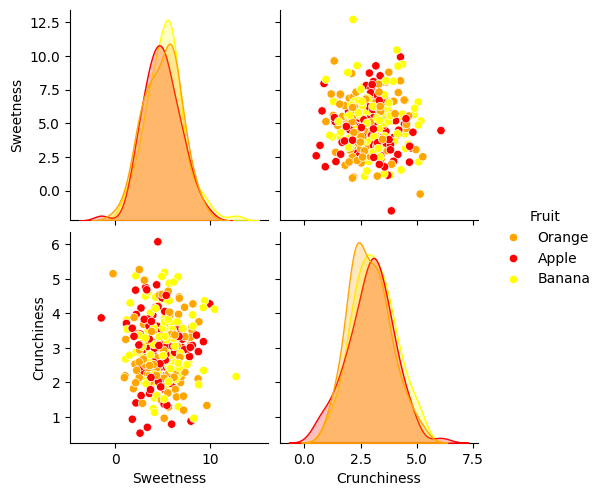

In [233]:
sns.pairplot(df_multi, vars=["Sweetness","Crunchiness"], hue="Fruit", palette=["orange","red","yellow"])
plt.show()


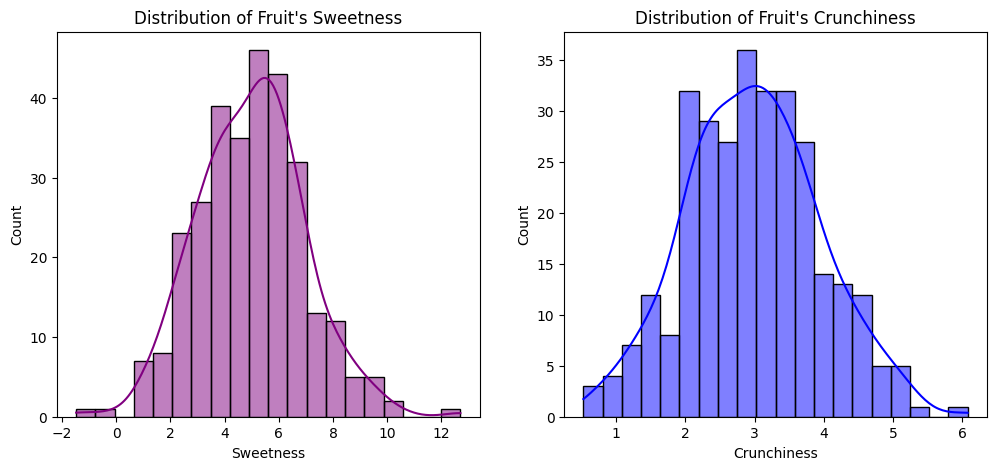

In [234]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df_multi["Sweetness"], bins=20, kde=True, color="purple")
plt.title("Distribution of Fruit's Sweetness")


plt.subplot(1,2,2)
sns.histplot(df_multi["Crunchiness"], bins=20, kde=True, color="blue")
plt.title("Distribution of Fruit's Crunchiness")

plt.show()

<Axes: xlabel='Fruit', ylabel='Count'>

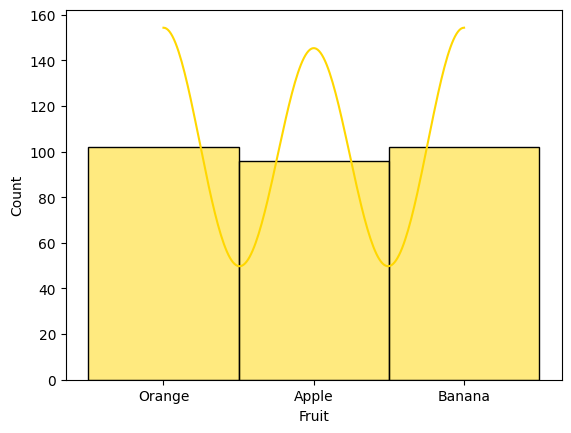

In [235]:
sns.histplot(df_multi["Fruit"],bins=20,kde=True,color="gold")

In [236]:
df_multi["Fruit"].value_counts()

,count
Fruit,
Orange,102
Banana,102
Apple,96


/tmp/ipython-input-3256424886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Fruit", data=df_multi, palette=["orange","red","yellow"])


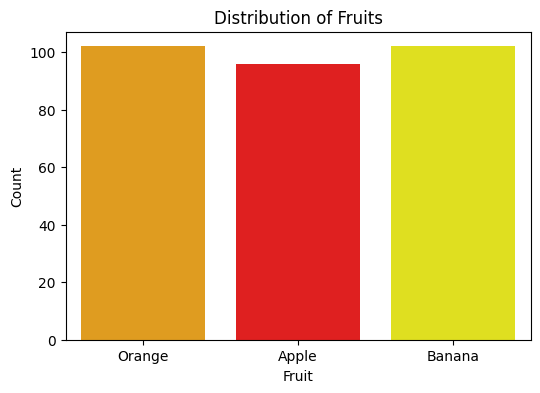

In [237]:
plt.figure(figsize=(6,4))
sns.countplot(x="Fruit", data=df_multi, palette=["orange","red","yellow"])
plt.title("Distribution of Fruits")
plt.xlabel("Fruit")
plt.ylabel("Count")
plt.show()


In [238]:
# Percentage distribution
df_multi["Fruit"].value_counts(normalize=True) * 100

,proportion
Fruit,
Orange,34.0
Banana,34.0
Apple,32.0


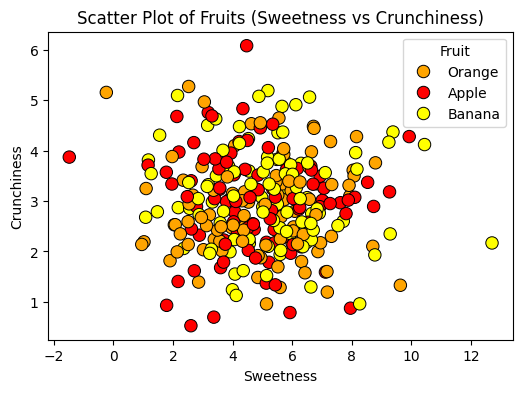

In [239]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Sweetness",
    y="Crunchiness",
    hue="Fruit",
    data=df_multi,
    palette=["orange","red","yellow"],
    s=80, edgecolor="k"
)
plt.title("Scatter Plot of Fruits (Sweetness vs Crunchiness)")
plt.xlabel("Sweetness")
plt.ylabel("Crunchiness")
plt.legend(title="Fruit")
plt.show()


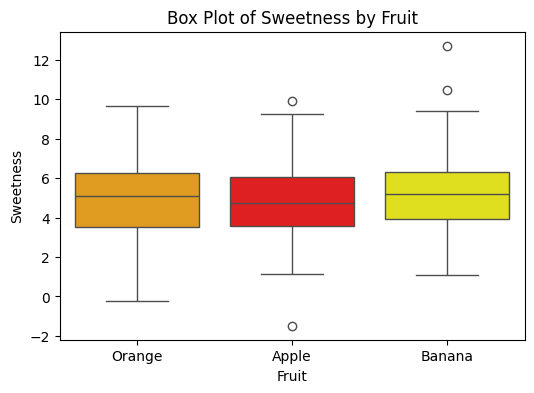

In [240]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Fruit", y="Sweetness", data=df_multi,hue="Fruit",legend=False, palette=["orange","red","yellow"])
plt.title("Box Plot of Sweetness by Fruit")
plt.xlabel("Fruit")
plt.ylabel("Sweetness")
plt.show()


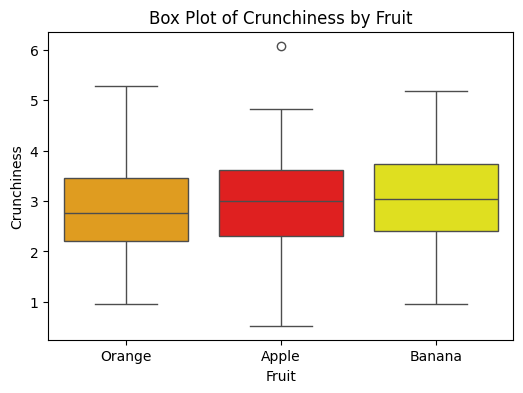

In [241]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Fruit", y="Crunchiness", data=df_multi, hue="Fruit",legend=False,palette=["orange","red","yellow"])
plt.title("Box Plot of Crunchiness by Fruit")
plt.xlabel("Fruit")
plt.ylabel("Crunchiness")
plt.show()


`split feature`

In [242]:
X=df_multi[["Sweetness","Crunchiness"]]
y=df_multi["Fruit"]

`train test split`

In [243]:
# stratify=y → ensures each fruit type is represented proportionally in train and test (avoids imbalance)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

`logistic regression for multi class`

solver="lbfgs" → optimization algorithm recommended for small/medium datasets.

In [244]:
model = LogisticRegression(multi_class="multinomial", solver="lbfgs")

`fit`

In [245]:
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

`predictions`

In [246]:
y_pred=model.predict(X_test)

`evaluate`

In [247]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.35


In [248]:
print("classification report :\n",classification_report(y_test,y_pred))

classification report :
               precision    recall  f1-score   support

       Apple       0.00      0.00      0.00        19
      Banana       0.33      0.48      0.39        21
      Orange       0.44      0.55      0.49        20

    accuracy                           0.35        60
   macro avg       0.26      0.34      0.29        60
weighted avg       0.26      0.35      0.30        60



confusion matrix

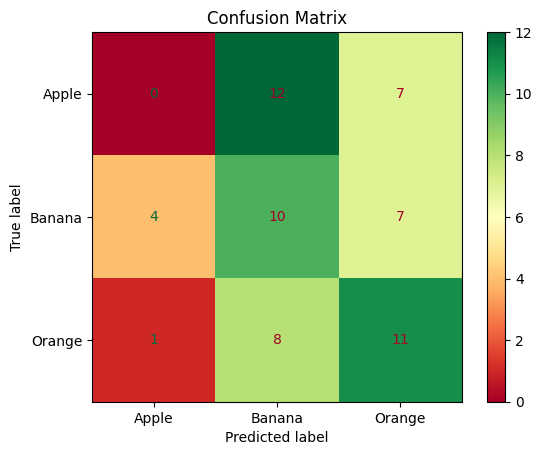

In [249]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="RdYlGn")
plt.title("Confusion Matrix")
plt.show()

#`📌 Conclusion`

The Logistic Regression model performed poorly on predicting fruit types

Apple was never correctly predicted (precision, recall, and F1 = 0).

Banana had slightly better results (recall = 0.48), but still low precision (0.33), showing frequent misclassifications.

Orange performed the best among the three (precision = 0.44, recall = 0.55), but accuracy remains low.

The overall accuracy is only 35%, close to random guessing for 3 classes.